# DnD Character Creation Analysis

## Motivation

The motivation behind this project stemmed from my passion for Dungeons and Dragons. As an avid fan, I became intrigued by the question of which character creation method yields the best results. Within the game, Dungeon Masters employ various approaches for players to obtain their starting stats. Some opt for rolling a d20 for each stat, while others utilize methods like 3d6 drop the lowest, allowing for a normal distribution which maintains an element of randomness without as high of a risk of characters becoming excessively powerful or weak. Alternatively, some Dungeon Masters prefer to minimize randomness by employing standard array or point buy systems, which offer predetermined stat pools.

This paper aims to visualize and analyze different methods of stat generation in Dungeons and Dragons character creation. Through comprehensive exploration, I will draw my own conclusions regarding the most effective approaches for crafting a character.

The methods of stat generation included in this analysis are d20, 3d6, 3d6 reroll 1s, 4d6 drop the lowest, and 4d6-4. Additionally, I will examine the standard array and point buy systems.

*Note: For those unfamiliar with the terminology, "d20" refers to rolling a 20-sided die for each stat, while "4d6 drop the lowest" involves rolling four 6-sided dice and discarding the lowest result. In contrast, "4d6-4" requires rolling four 6-sided dice and then subtracting 4 from the total.*

## Introduction

Dungeons and Dragons (D&D) tabletop role-playing game. One of the core features of D&D lies in the process of creating characters with their own distinct abilities and attributes. This requires generating various statistics, or stats, which play a crucial role in shaping the character's capabilities and potential. There are 6 stats in total each related to a different attribute of the character and each stat ranges from 1-20 with anything above 10 helping the character and below 10 causing weaknesses to the character. 

Within D&D, Dungeon Masters must make a decision choosing between different approaches to enable players to obtain their starting stats. Some methods of rolling for character creation is rolling a d20 for each stat, causing an unpredictable nature of chance. Others prefer methods like 3d6, which involves rolling three six-sided dice and summing the results, or 3d6 reroll 1s, where any roll of 1 is rerolled once, as well as other methods like 4d6 drop the lowest which involves players rolling 4 dices and dropping whichever is the lowest. These methods provide a certain level of randomness, ensuring that characters possess a diverse range of strengths and weaknesses. For Dungeon Masters who desire to eliminate randomness completely and give control over their character's stats, the standard array which lets players assign each of their stats to a number in (15, 14, 13, 12, 10, 8) and point buy systems offer predetermined stat pools from which players can allocate points as desired. To most optimize their stats in point buy, players can get stats up to (15, 15, 15, 8, 8, 8) using point buy.

## Motivation

Motivated by a passion for D&D, this project aims to delve into the intricacies of stat generation in character creation. By undertaking a comprehensive exploration and analysis of different methods, I seek to determine the most effective approaches for crafting well-rounded and engaging characters. Through this endeavor, I hope to provide valuable insights to both players and Dungeon Masters.

## Goals of an Effective Character Generation System
In order to determine the most optimal system for character generation in Dungeons and Dragons, it is essential to establish a set of guiding principles. These principles will serve as the foundation for evaluating and comparing different methods. The following goals will be considered when determining the effectiveness of a character creation method:

* **Improbability of Extremely Low Rolls:** In the world of D&D, characters are expected to have stats that lean towards higher values rather than lower ones. It is important to minimize the likelihood of exceptionally low rolls for stats, as having extremely weak attributes can significantly hinder a character's abilities and overall gameplay experience. The goal is that stats which are lower than 8 should be rare and stats that are lower than 5 should be almost impossible

* **Presence of 1-2 Strong Stats:** The focus should be on ensuring that players have at least 1-2 stats that are notably high. A desirable outcome is to have most players possess stats in the range of 15-18 for a couple of key attributes, allowing them to excel in their chosen areas of expertise.

* **Balanced Stat Values:** Non-randomized methods such as point buy or standard array provide a controlled approach to character creation. These methods typically offer a mean value of 11.5 or 12 for each stat, respectively. The goal is to maintain stat values around these averages, possibly slightly higher due to the inherent risk involved, while avoiding excessive inflation that could lead to imbalances within the game.

* **Reduced Variance:** While a certain level of luck is inherent in character creation, it is crucial to minimize the variance between players' stat distributions. This ensures that no player ends up significantly stronger or weaker than others, thus preventing imbalanced gameplay and preserving the enjoyment of all participants.

By considering these goals, we can evaluate different character generation systems to determine which method best meets these criteria and provides an optimal balance of fairness, player satisfaction, and engaging gameplay.

## Into the Code

In [1]:
# !pip install --upgrade matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
# Simulates 1 roll through of simulated dice

# roll(n=100000, die=10, times=2, addative= 3, drop=0, drop_lowest=True, reroll_1=False)
# would be running 2d10 + 3*2 10000 times

# die is the number of the sides the dice are
# ex die=20 for a d20
# times is the number of times you roll said die
# die=20 times=2 will calculate 2d20
# addative is a flat number added to EACH roll 
# 2d20 with an addative of 3 will add 2(times) * 3
# Drop is the number of lowest/highest dice that will be dropped
# Drop_lowest will drop the lowest dice, if set to flase it will drop the highest

def roll(die, times, addative= 0, drop=0, drop_lowest=True, reroll_1=False):
    rolls = []
    sum = 0
    
    for i in range(times):
        new_roll = np.random.randint(1,die+1) + addative
        while new_roll == 1 and reroll_1:
            new_roll = np.random.randint(1,die+1) + addative
        rolls.append(new_roll)
#     print(rolls)
    if drop_lowest:
        rolls.sort(reverse=False)
    else:
        rolls.sort(reverse=True)
    for i in range(drop, len(rolls)):
        sum += rolls[i]
#     print(sum)
    return sum

In [3]:
# Does n roll through of simulated dice

# It then returns a pyplot histogram of the rolls
# With the x-axis being the specific result
# And the y-axis being the odds of said roll

# roll(die=10, times=2, addative= 3, drop=0, drop_lowest=True, reroll_1=False)
# would be 2d10 + 3*2

# n is the number of times it runs the test (higher will be closer to average but takes longer
# 100000 is a good tradeoff 
# die is the number of the sides the dice are
# ex die=20 for a d20
# times is the number of times you roll said die
# die=20 times=2 will calculate 2d20
# addative is a flat number added to EACH roll 
# 2d20 with an addative of 3 will add 2(times) * 3
# Drop is the number of lowest/highest dice that will be dropped
# Drop_lowest will drop the lowest dice, if set to flase it will drop the highest
# Reroll_1s will reroll every 1 you get on the die
# color just changes the color of the graph

def graph_roll(n, die, times, addative=0, drop=0, drop_lowest=True, reroll_1=False, color="lightblue"):
    rolls = []
    max_roll = die*(times-drop)

    sum = 0
    mean = 0
    rounded_mean = 0
    
    # Create the figure to return
    fig= plt.figure()
    ax = plt.gca()
    
    # Calculate each roll
    for i in range(n):
        rolls.append(roll(die=die, times=times, drop=drop, addative=addative, drop_lowest=drop_lowest, reroll_1=reroll_1))
    
    # Calculate mean
    for i in rolls:
        sum += i
    mean = sum/n
    rounded_mean = np.round(mean)
    
    # Creates bins and aligns them in between each box
    bins = np.arange(max_roll+1) + 1 - 0.5 # Used to make xtick centered for bins
    plt.xticks(range(1, max_roll+1))
   
    # Creates the histogram
    n, bins, patches = plt.hist(rolls, bins=bins, color=color, alpha=0.5, histtype='bar', ec='black', density = True);
  
    # Makes the bin color based on the density in each bin
#     for i in range(len(patches)):
#         patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
    
    # Changes the color of the mean bin
#     patches[int(rounded_mean)].set_fc('red') # Set color
#     patches[int(rounded_mean)].set_alpha(1) # Set opacity
    
    # Creates yticks
    ymax = plt.axis()[3]
    plt.ylim([0,ymax+ (.05*ymax)])
    
    # Add kde line
    sns.kdeplot(rolls, bw_adjust=1.75, cut=0)

    # Adds a vertical line at the mean
    plt.axvline(x = mean+.5, color = 'black', alpha=.75, linestyle = ":", ymax=.3) # Adds .5 to mean because offcenter of bins to create number in center
    plt.text(mean-.25, ymax*.35, "mean", verticalalignment='center')
    
    return(fig)

In [11]:
# Creates a class consisting of the 
# array of rolls
# A string ith the title of the rolls
# A string with a color to be used
class Plot:
    rolls = []
    title = ""
    color = ""
    def __init__(self, rolls, title, color):
        self.rolls = rolls
        self.title = title
        self.color = color

In [17]:
# Requires an array of values rolled, and a threshold number 
# Returns the odds of rolling that many of the same number 1,2,3 times (returned in an array)
# Within 6 (the number of stats each player has) rolls
# So for example it was a 50% chance a player would roll above a 3
# it will return the odds that they will get at least one 3 or greater
# As well as the odds of it happening 2 or 3 times
def odds_of_x (rolls_array, threshold):
    threshold_count = 0
    for roll in rolls_array:
        if roll >= threshold:
            threshold_count += 1
     
    # Checks 10000 times rolling 6 of stats a character has)
    # And calculates how many times 1+ 2+ or 3+ times the roll occurs
    times_threshold_rolls = np.random.binomial(6, (threshold_count / len(rolls_array)), 10000)
    times_roll_1_count = 0
    times_roll_2_count = 0
    times_roll_3_count = 0
    for result in times_threshold_rolls:
        if result >= 1:
            times_roll_1_count += 1
            if result >= 2:
                times_roll_2_count += 1
                if result >= 3:
                    times_roll_3_count += 1
    
    times_roll_1_count = np.round((times_roll_1_count/100),2)
    times_roll_2_count = np.round((times_roll_2_count/100),2)
    times_roll_3_count = np.round((times_roll_3_count/100),2)
    
    return [times_roll_1_count, times_roll_2_count, times_roll_3_count]

In [4]:
# Does n roll through of simulated dice

# It then returns a pyplot histogram of the rolls
# With the x-axis being the specific result
# And the y-axis being the odds of said roll

# roll(die=10, times=2, addative= 3, drop=0, drop_lowest=True, reroll_1=False)
# would be 2d10 + 3*2

# n is the number of times it runs the test (higher will be closer to average but takes longer
# 100000 is a good tradeoff 
# die is the number of the sides the dice are
# ex die=20 for a d20
# times is the number of times you roll said die
# die=20 times=2 will calculate 2d20
# addative is a flat number added to EACH roll 
# 2d20 with an addative of 3 will add 2(times) * 3
# Drop is the number of lowest/highest dice that will be dropped
# Drop_lowest will drop the lowest dice, if set to flase it will drop the highest
# Reroll_1s will reroll every 1 you get on the die
# color just changes the color of the graph

def graph_roll(ax, n, die, times, addative=0, drop=0, drop_lowest=True, reroll_1=False, color="lightblue"):
    rolls = []
    max_roll = die*(times-drop)

    sum = 0
    mean = 0
    rounded_mean = 0
    
    # Calculate each roll
    for i in range(n):
        rolls.append(roll(die=die, times=times, drop=drop, addative=addative, drop_lowest=drop_lowest, reroll_1=reroll_1))
    
    # Calculate mean
    for i in rolls:
        sum += i
    mean = sum/n
    rounded_mean = np.round(mean)
    
    # Creates bins and aligns them in between each box
    bins = np.arange(20+1) + 1 - 0.5 # Used to make xtick centered for bins
    ax.set_xticks(range(1, 20+1))
   
    # Creates the histogram
    n, bins, patches = ax.hist(rolls, bins=bins, color=color, alpha=0.5, histtype='bar', ec='black', density = True);
  
    # Makes the bin color based on the density in each bin
#     for i in range(len(patches)):
#         patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
    
    # Changes the color of the mean bin
#     patches[int(rounded_mean)].set_fc('red') # Set color
#     patches[int(rounded_mean)].set_alpha(1) # Set opacity
    
    # Creates yticks
    ymax = ax.axis()[3]
    ax.set_ylim([0,ymax+ (.125*ymax)])
    
    # Add kde line
    sns.kdeplot(rolls, bw_adjust=1.75, cut=0, ax=ax)

    # Adds a vertical line at the mean
    ax.axvline(x = mean+.5, color = 'black', alpha=.75, linestyle = ":", ymax=.3, linewidth=3) # Adds .5 to mean because offcenter of bins to create number in center
    ax.text(mean-.25, ymax*.35, "mean", verticalalignment='center')
    
    return(ax, rolls)

## Visualization

The visualization provided for each character generation method includes a histogram depicting the data distribution, with the mean value highlighted. Additionally, a separate graph compares the kernel density estimations of each distribution.

The analysis reveals that using a d20 for character creation yields the least desirable results if avoiding variance is of any concern. This method relies solely on chance, with no control over the outcome.

The second least favorable method in terms of character balance is 4d6-4. Not only does it have the lowest mean value, but it also exhibits the highest variance among all methods, except for simply rolling a single D20.

For Dungeon Masters seeking a more "normally distributed" approach to generating stats, the 4d6 drop lowest and reroll 1s method offers the best option, providing consistent rolls. However, it's worth noting that the average roll with this method is higher compared to other character creation methods, which may pose balancing challenges for most game tables. One way to address this is by subtracting a number, such as 2, from the total to enhance balancing.

Apart from 4d6 drop lowest and reroll 1s, another visually appealing choice is 3d6 reroll 1s. This method exhibits a sharp, normal distribution and aligns closely with the mean of other rolls, making it an attractive option in terms of visual representation.

Both the 3D6 and 4D6 drop lowest methods exhibit relatively modest levels of variance, falling below the variance observed in 4D6 reroll 1s and the drop lowest as well as the 3D6 reroll 1s methods. However, they still demonstrate higher variance compared to the 4D6-4 and D20 methods.






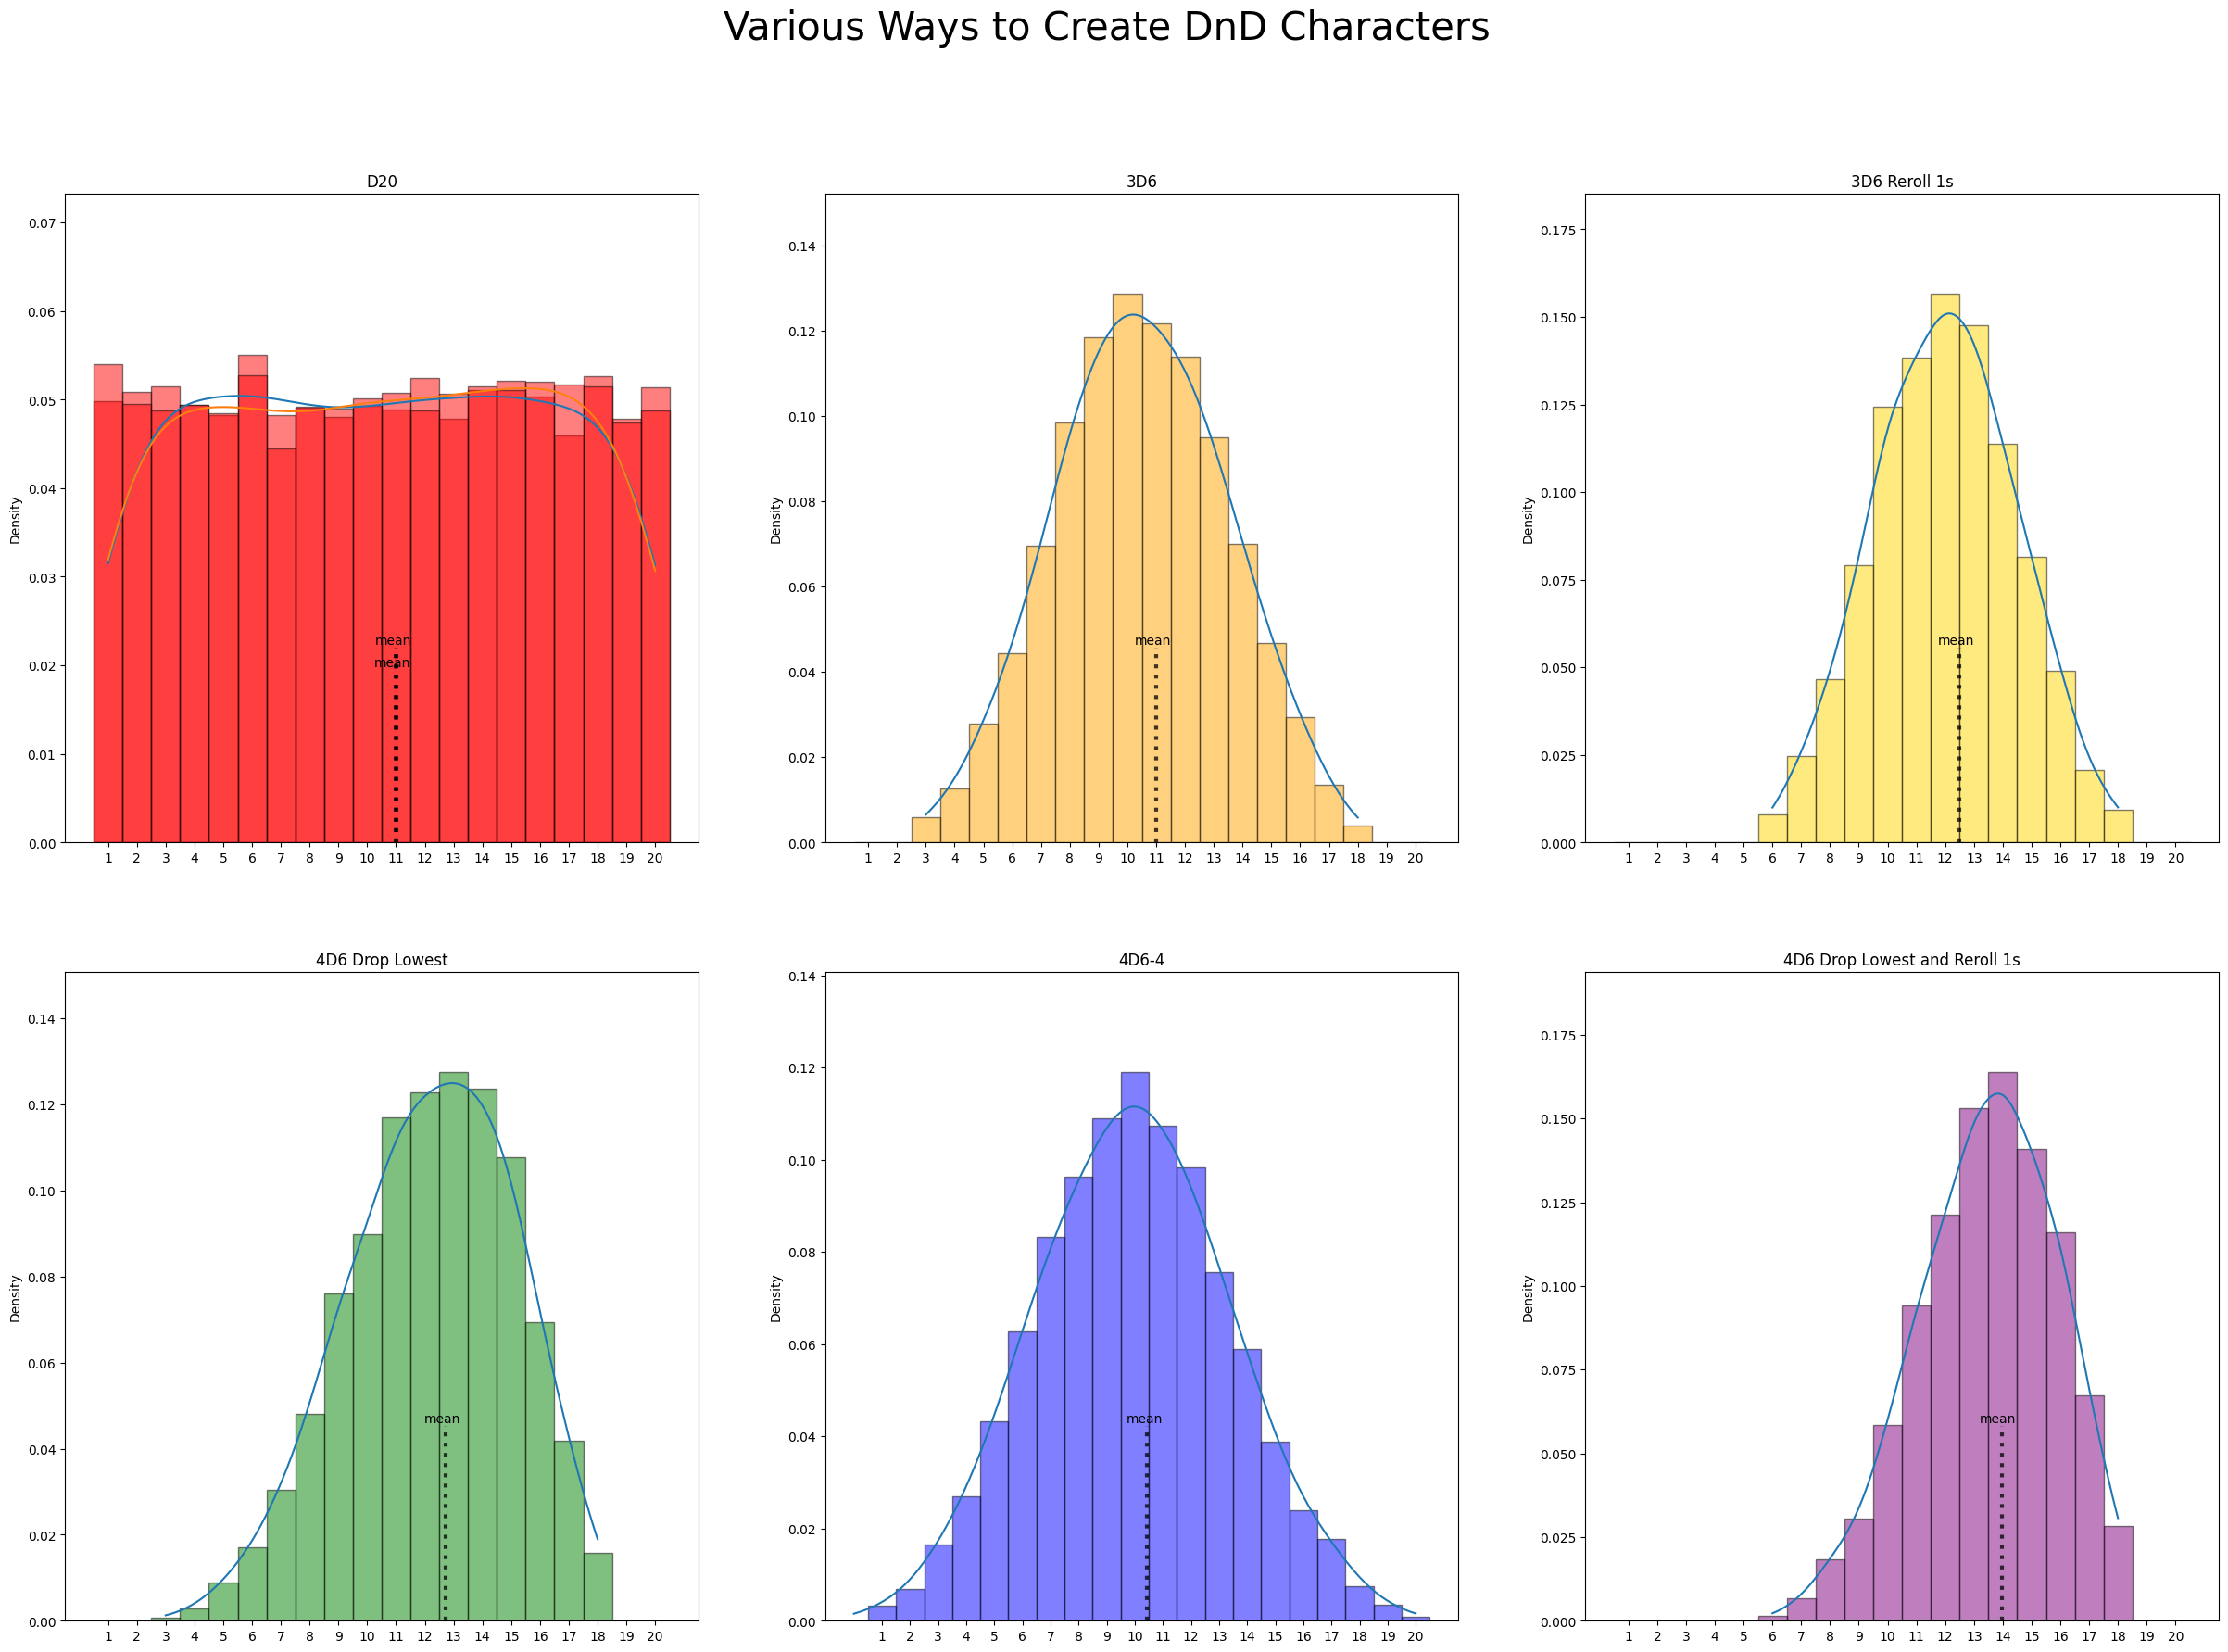

In [5]:
# Creates a graph with of each roll with each type of way you can create a dnd character
# The options are 1d20, 3d6, 3d6 and reroll 1s, 4d6 drop lowest, and 4d6 drop lowest and reroll 1s

# n is the number of times it runs the test (higher will be closer to average but takes longer
# # 100000 is a good tradeoff 
n=10000
fig, axis = plt.subplots(2, 3)
fig.suptitle("Various Ways to Create DnD Characters", fontsize=30)

fig.set_figheight(20)
fig.set_figwidth(30)
kdes = []

kde = graph_roll(axis[0,0], n, die=20, times=1, color="red")
axis[0,0], kde = graph_roll(axis[0,0], n, die=20, times=1, color="red")
axis[0,0].set_title("D20");
p = Plot(kde, "D20", "red")                 
kdes.append(p)

axis[0,1], kde =  graph_roll(axis[0,1], n, die=6, times=3, addative=0, color="orange")
axis[0,1].set_title("3D6");
p = Plot(kde, "3D6", "orange")  
kdes.append(p)

axis[0,2], kde =  graph_roll(axis[0,2], n, die=6, times=3, addative=0, reroll_1=True, color="gold")
axis[0,2].set_title("3D6 Reroll 1s");
p = Plot(kde, "3D6 Reroll 1s", "gold")  
kdes.append(p)

axis[1,0], kde =  graph_roll(axis[1,0], n, die=6, times=4, addative=0, drop=1, drop_lowest=True, color="green")
axis[1,0].set_title("4D6 Drop Lowest");
p = Plot(kde, "4D6 Drop Lowest", "green")  
kdes.append(p)

### WHY WONT LET ME ADD THIS AND PUT LAST PLOt on it oWN LINE
axis[1,1], kde = graph_roll(axis[1,1], n, die=6, times=4, drop=0, addative=-1, color="blue")
axis[1,1].set_title("4D6-4");
p = Plot(kde, "4d6-4", "blue")  
kdes.append(p)

axis[1,2], kde = graph_roll(axis[1,2], n, die=6, times=4, drop=1, drop_lowest=True, reroll_1=True, color="purple")
axis[1,2].set_title("4D6 Drop Lowest and Reroll 1s");
p = Plot(kde, "4D6 Drop Lowest and Reroll 1s", "purple")  
kdes.append(p)

# plt.savefig('dnd1.png', transparent=True)

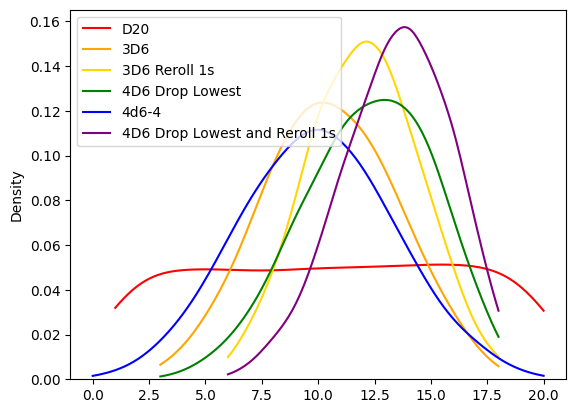

In [6]:
# Creates a kde plot comparing each of the rolls to eachother
for kde in kdes:
    sns.kdeplot(kde.rolls, cut=0, bw_adjust=1.75, color=kde.color, label=kde.title)
    plt.legend()

# plt.savefig('dnd2.png', transparent=True)

# Note, the "sharper" the line is on the chart the more likely results are to be the same

## Numeric Analysis

The d20 method once again proves to be a poor choice for character creation, as it allows for approximately 5% of players to have 3 of their 6 stats above 18

Next, the 3d6 method offers a relatively low mean and median, both around 10, similar to the d20 method. This means that both rolling methods result in similar total stats, but 3d6 prevents players from rolling excessively high or low. However, 3d6 often falls short, with around 75% of players unable to roll 2 or more 15s, making it significantly worse than the standard array and point buy methods in creating powerful characters.

Both the 3d6 reroll 1s and 4d6 drop lowest methods yield similar mean and median results. However, with 4d6 reroll 1s, players are much more likely to achieve higher rolls, with 80% of players getting at least 1 stat of 15 or above, and 44% getting at least two stats above 15. In comparison, 3d6 reroll 1s results in 65% of players getting at least 1 stat of 15 or above, and 25% getting at least two stats above 15. Despite this, 3d6 reroll 1s has a higher minimum value of 6 compared to 3, meaning it is less likely to result in lower numbers and more likely to gravitate towards the median. Both 3d6 reroll 1s and 4d6 drop lowest are comparable to the standard array and point buy methods, with slightly higher means of 12 and 12.25, respectively, compared to the mean of 11.5 for the standard array and point buy. This makes them both good choices for maintaining balance while incorporating some level of randomness.

The 4d6-4 method offers the lowest mean and median out of all the options, and less than a 10% chance of resulting in 2 rolls of at least 15. This makes it significantly worse than point buy and standard array methods.

Lastly, the 4d6 drop lowest and reroll 1s methods produce the highest rolls by a significant margin, with a mean of over 13 and a median of 14. Over half of the players end up rolling at least 2 stats of 18, making it unsuitable for campaigns that do not intend for players to be significantly overpowered.

In [18]:
# Prints the number of each value and the percent of it occuring for each roll type
# So for d20 it will print 1-20 and the number of times each occured and their % (for that it would be approximately 5%)

for method in kdes:
    print(f"Number of Each Value in {method.title}:")
    unique, counts = np.unique(method.rolls, return_counts=True)
    for i in range(len(counts)):
        print(f"{unique[i]}: {counts[i]} {np.round(counts[i] / len(method.rolls) * 100 , 2)}%" )
    print("")

Number of Each Value in D20:
1: 540 5.4%
2: 495 4.95%
3: 488 4.88%
4: 494 4.94%
5: 485 4.85%
6: 527 5.27%
7: 445 4.45%
8: 492 4.92%
9: 490 4.9%
10: 501 5.01%
11: 508 5.08%
12: 488 4.88%
13: 507 5.07%
14: 515 5.15%
15: 511 5.11%
16: 520 5.2%
17: 517 5.17%
18: 515 5.15%
19: 474 4.74%
20: 488 4.88%

Number of Each Value in 3D6:
3: 59 0.59%
4: 127 1.27%
5: 278 2.78%
6: 444 4.44%
7: 695 6.95%
8: 985 9.85%
9: 1184 11.84%
10: 1287 12.87%
11: 1217 12.17%
12: 1138 11.38%
13: 949 9.49%
14: 700 7.0%
15: 468 4.68%
16: 293 2.93%
17: 136 1.36%
18: 40 0.4%

Number of Each Value in 3D6 Reroll 1s:
6: 80 0.8%
7: 247 2.47%
8: 467 4.67%
9: 792 7.92%
10: 1243 12.43%
11: 1385 13.85%
12: 1567 15.67%
13: 1476 14.76%
14: 1137 11.37%
15: 814 8.14%
16: 490 4.9%
17: 208 2.08%
18: 94 0.94%

Number of Each Value in 4D6 Drop Lowest:
3: 8 0.08%
4: 29 0.29%
5: 89 0.89%
6: 170 1.7%
7: 305 3.05%
8: 481 4.81%
9: 760 7.6%
10: 899 8.99%
11: 1170 11.7%
12: 1229 12.29%
13: 1276 12.76%
14: 1236 12.36%
15: 1078 10.78%
16: 693 

In [19]:
# Goes through each plot and calculates:
# Min/max
# Mean/median
# Standard deviation
# Percent above threshold 1 (15)
# Percent above threshold 2 (18)
# Odds of within generating a character within 6 stats getting at least 1/2/3 or more above thrshold 1 and threshold 2

high_val_threshold = 15
higher_val_threshold = 18
for method in kdes:
    
    print(f"{method.title}:")
    print(f"Minimum possible value: {np.min(method.rolls)}")
    print(f"Maximum possible value: {np.max(method.rolls)}")
    
    print(f"Mean: {np.mean(method.rolls)}")
    print(f"Median: {np.median(method.rolls)}")
    
    print(f"Standard Deviation {np.round(np.std(method.rolls), 2)}")
    
    print(f"The percent of values equal to or above {high_val_threshold}: {np.round(high_val_count / len(method.rolls) * 100 , 2)}")
    print(f"The percent of values equal to or above {higher_val_threshold}: {np.round(higher_val_count / len(method.rolls) * 100 , 2)}")
    
    roll_1, roll_2, roll_3 = odds_of_x(method.rolls, high_val_threshold)
    print(f"Odds of rolling at least one roll equal to or greater than {high_val_threshold}: {roll_1}")
    print(f"Odds of rolling at least two roll equal to or greater than {high_val_threshold}: {roll_2}")
    print(f"Odds of rolling at least three roll equal to or greater than {high_val_threshold}: {roll_3}")
    
    roll_1, roll_2, roll_3 = odds_of_x(method.rolls, higher_val_threshold)
    print(f"Odds of rolling at least one roll equal to or greater than {higher_val_threshold}: {roll_1}")
    print(f"Odds of rolling at least two roll equal to or greater than {higher_val_threshold}: {roll_2}")
    print(f"Odds of rolling at least three roll equal to or greater than {higher_val_threshold}: {roll_3}")
    
    print("")

D20:
Minimum possible value: 1
Maximum possible value: 20
Mean: 10.5083
Median: 11.0
Standard Deviation 5.78
The percent of values equal to or above 15: 35.24
The percent of values equal to or above 18: 2.82
Odds of rolling at least one roll equal to or greater than 15: 88.44
Odds of rolling at least two roll equal to or greater than 15: 59.0
Odds of rolling at least three roll equal to or greater than 15: 26.48
Odds of rolling at least one roll equal to or greater than 18: 62.11
Odds of rolling at least two roll equal to or greater than 18: 21.74
Odds of rolling at least three roll equal to or greater than 18: 4.67

3D6:
Minimum possible value: 3
Maximum possible value: 18
Mean: 10.493
Median: 10.0
Standard Deviation 2.96
The percent of values equal to or above 15: 35.24
The percent of values equal to or above 18: 2.82
Odds of rolling at least one roll equal to or greater than 15: 45.03
Odds of rolling at least two roll equal to or greater than 15: 10.51
Odds of rolling at least three

## Conclusion

Upon analyzing the statistics and results of each dice roll method, several conclusions can be drawn:

* Firstly, it is evident that any system of character creation is preferable to using the d20 method alone. The d20 method introduces a high level of randomness and can lead to characters with overly powerful or weak attributes.

* Secondly, both the 4d6 Drop Lowest and Reroll 1s method and the 3d6 Reroll 1s method exhibit greater consistency in their results. These methods help prevent significant disparities among players, ensuring a more balanced gameplay experience.

* Furthermore, when comparing the results of 3d6 Reroll 1s and 4d6 Drop Lowest to the point buy and standard array methods, it becomes apparent that they offer a similar level of balance. These rolling methods align more closely with the controlled nature of point buy and standard array, while still incorporating an element of chance.

Taking these conclusions into consideration, the **3d6 Reroll 1s method emerges as the most favorable choice** for character creation. It not only produces results that are balanced when compared to standard array and point buy but also provides consistent outcomes, promoting fairness and balanced gameplay in your next campaign.